## Read dataset with pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cal-housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Check NaN values

In [4]:
dfNan = df[df.isna().any(axis=1)]
dfNan

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [5]:
df['total_bedrooms'].isnull().sum()

207

total_bedrooms - 207 NaN Values

all other labels have no NaN values

## Categorical values transformation:

In our dataset only one value (column) is categorical: 'ocean_proximity'


#### 2 possible solutions:

1) If ocean_proximity is ordinal Data, we simply transform out data to int value in reverse order of dictanse to Ocean

2) If ocean_proximity is nominal Data, we in a place of ocean_proximity column create n columns (where n is a number of unique possible values of ocean_proximity) and place 1 if comumn 'i' if value of ocean_proximity is equal to 'i' (One Hot Encoding)


In [6]:
#unique values of ocean_proximity column

df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### Option 1:
we can think our data in ocean_proximity column as ordinal Data, so we trasform ou stat in this values:

INLAND     -> 0

<1H OCEAN  -> 1

NEAR BAY   -> 2

NEAR OCEAN -> 3

ISLAND     -> 4

In [7]:
def ordDataTransform(dt):
    data = dt.copy()
    data = data.replace('INLAND',0)
    data = data.replace('<1H OCEAN',1)
    data = data.replace('NEAR BAY',2)
    data = data.replace('NEAR OCEAN',3)
    data = data.replace('ISLAND',4)
    return data

#ordData = ordDataTransform(df)

#### Option 2:

We can transform our column of categorical data to multiple columns:

1) create new columns 'INLAND','<1H OCEAN','NEAR BAY','NEAR OCEAN','ISLAND' with binary possible values (1 in column 'i' in row j if in column 'ocean_proximity' and row j  value is equal to 'i', 0 otherwise) 

2) delete 'ocean_proximity' column


##### Solution from pandas library: pd.get_dummies(df, ['ocean_proximity'])

In [8]:
def nomDataTransform(data):
    return pd.get_dummies(data,['ocean_proximity'])

#norm = nomDataTransform(df)

## Methods to deal with Nan Values:

1 - row elimination

2 - apply to NaN value of mean value of the column

3 - apply to NaN value of mode value of the column

### 1) Row elimination

In [9]:
def elimdf(data):
    eldf = data.dropna()
    return eldf

# eldf = elimdf(df)

### 2) Mean value

In [10]:
def meandf(data):
    meandf = data.fillna(round(df.mean()))
    return meandf

# meandf = meandf(df)

### 3) Mode

In [11]:
def modedf(data):
    mode = df['total_bedrooms'].mode()
    modedf = data.copy()
    modedf['total_bedrooms'] = data['total_bedrooms'].fillna(mode[0])
    return modedf

#modedf = modedf(df)

## Ridge regression

Creation of Training Set and Test Set

In [12]:
def splitData(data):
    train=data.sample(frac=0.8)
    test=data.drop(train.index)
    return train,test

#Train, Test = splitData(df)

Creation of Training Set and Cross-Validation Set from Training Set made by splitData()

In [13]:
def crossSplitTrain(data,k,kMax): #with k,kMax >= 1
    n = len(data)//kMax
    cross = data.iloc[(n*(k-1)):(n*k),:]
    train = data.drop(cross.index)
    return cross,train

#cross, test = crossSplitTrain(df,1,10)

Creation of X and Y Sets

X need aditional column with 1 in each value for Bias

In [29]:
#addVal is boolean value, when true add "add" to every entry of our data as new feature, 1 by default
def splitAnswer(data, columnName,addVal,add = 1):
    y = data[columnName]
    x = data.drop(columns=[columnName])
    if addVal == True:
        x.insert(0,"ones", add)
    return x,y

Normalization (transform all data in range from -1 to 1)

In [15]:
def normalization(data):
    result = data.copy()
    for column in data.columns:
        mean = data[column].mean()
        s = data[column].max()-data[column].min()
        result[column] = (data[column] - mean)/s
    return result

In [16]:
def dataPreparetionColumn(data,catDataMeth,nanMeth,norm,yColumn):
    if norm == True:
        dt = data.drop([yColumn], axis=1)
        result = normalization(nanMeth(catDataMeth(dt)))
        result.insert(1, yColumn, data[yColumn], True)
    else:
        result = nanMeth(catDataMeth(data))
    result = result.sample(frac=1).reset_index(drop=True)
    return result

# train, test = dataPreparetion(train,test,catDataMeth,nanMeth,True,'median_house_value')

#### For our Ridge Regression I'll use closed form solution

#### Ridge Regression

In [17]:
def rr(dfX,dfY,alpha):
    ind = np.identity(dfX.T.shape[0])# create identity matrix
    inv = np.linalg.inv(np.dot(alpha,ind) + np.dot(dfX.T.to_numpy(),dfX.to_numpy()))
    a = np.dot(dfX.T.to_numpy(),dfY.to_numpy())
    w = np.dot(inv,a)
    return w

#### Error

In [18]:
def cv_error(x,y,w):
    a = y - np.dot(x,w)
    cost = np.dot(a.T,a)
    return cost

Try our ridge regression with parameter alpha = 1e-3 and mean value and ordinal data reansformation

In [19]:
modelCVData = df.copy()
modelCVData = modelCVData.sample(frac=1).reset_index(drop=True)

In [30]:
def choose_method(catDataMeth,nanMeth,alpha,i,k):
    data = nanMeth(catDataMeth(modelCVData))
    test,train = crossSplitTrain(data,i,k)
    dfX,dfY = splitAnswer(train,'median_house_value',True,1)
    testX,testY = splitAnswer(test,'median_house_value',True,1)
    w = rr(dfX,dfY,alpha)
    
    error = cv_error(testX.to_numpy(),testY.to_numpy(),w)
    return error

In [31]:
error = 0
k = 5
for i in range(1,k+1): #5 folds
    error += (k/len(df))*choose_method(ordDataTransform,meandf,1e-3,i,k)
print(error/k)

4835110750.814886


mean value and nominal data

In [32]:
error = 0
k = 5
for i in range(1,k+1): #5 folds
    error += (k/len(df))*choose_method(nomDataTransform,meandf,1e-3,i,k)
print(error/k)

4749115506.432557


Row Elimination ordinal

In [33]:
error = 0
k = 5
for i in range(1,k+1): #5 folds
    error += (k/len(df))*choose_method(ordDataTransform,elimdf,1e-3,i,k)
print(error/k)

4775694783.700844


Row Elimination nominal

In [34]:
error = 0
k = 5
for i in range(1,k+1): #5 folds
    error += (k/len(df))*choose_method(nomDataTransform,elimdf,1e-3,i,k)
print(error/k)

4691325207.028249


Mode ordinal

In [35]:
error = 0
k = 5
for i in range(1,k+1): #5 folds
    error += (k/len(df))*choose_method(ordDataTransform,modedf,1e-3,i,k)
print(error/k)

4838270799.615375


Mode nominal

In [36]:
error = 0
k = 5
for i in range(1,k+1): #5 folds
    error += (k/len(df))*choose_method(nomDataTransform,modedf,1e-3,i,k)
print(error/k)

4751440583.408632


#### best result with row elimination + nominal transformation

We can use row elimination without big loss of data, because rows with nan value is about 1% from all data.

### Study the dependence of the cross-validated risk estimate on the parameter alpha of ridge regression.

Cross validation gives us possibility to evaluate our algorithms with different alpha parameter.

[91161578890.29213, 4714162369.563407, 4688482724.306643, 4681860798.353528, 4682353308.043478, 4682368674.498791, 4682361600.49411, 4682361800.606013, 4682360320.516236, 4682346039.271105, 4682208013.5638, 4681272945.590259, 4684332672.180141, 4697488505.861308, 4937914127.957665, 5493338424.656612, 8272181302.196884, 16311250112.441542, 43041495603.29063]


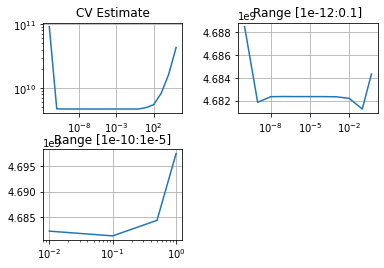

4681272945.590259 0.1


In [52]:
data = dataPreparetionColumn(df,nomDataTransform,elimdf,True,'median_house_value')
# alpha range from 1e-12 to 1e+5
alphaRange = [1e-12,1e-11,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05, 1e-04, 1e-03, 0.01, 0.1,0.5, 1,
              10,100,1000,10000,1e+5] 
#divide data in K folds
kMax = 10 #divide data for 10 external cross-validation folds
estimateCV = []
for alpha in alphaRange:
    costAlpha = 0
    for k in range(1,kMax+1):
        #if used range(1,kMax+1), need change crossSplitTrain(data,k,kMax) to crossSplitTrain(data,k+1,kMax+1)
        test,train = crossSplitTrain(data,k,kMax)
        dfX,dfY = splitAnswer(train,'median_house_value',True,1)
        testX,testY = splitAnswer(test,'median_house_value',True,1)
        w = rr(dfX,dfY,alpha)
        costAlpha += (kMax/len(df)) * cv_error(testX.to_numpy(),testY.to_numpy(),w)
    estimateCV.append((1/kMax)*costAlpha)
print(estimateCV)
fig = plt.figure()
plt.subplot(221)
plt.plot(alphaRange,estimateCV)
plt.xscale('log')
plt.yscale('log')
plt.title('CV Estimate')
plt.grid(True)
plt.subplot(222)
plt.plot(alphaRange[2:13],estimateCV[2:13])
plt.xscale('log')
plt.yscale('linear')
plt.title('Range [1e-12:0.1]')
plt.grid(True)
plt.subplot(223)
plt.plot(alphaRange[10:14],estimateCV[10:14])
plt.xscale('log')
plt.yscale('linear')
plt.title('Range [1e-10:1e-5]')
plt.grid(True)


plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()
print(min(estimateCV),alphaRange[estimateCV.index(min(estimateCV))])

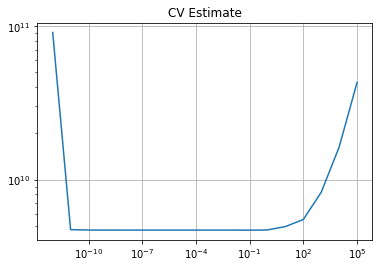

In [54]:
plt.plot(alphaRange,estimateCV)
plt.xscale('log')
plt.yscale('log')
plt.title('CV Estimate')
plt.grid(True)
#plt.savefig("CV_Alpha.png", dpi=400,bbox_inches='tight')

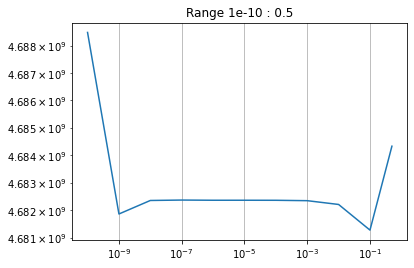

In [55]:
plt.plot(alphaRange[2:13],estimateCV[2:13])
plt.xscale('log')
plt.yscale('log')
plt.title('Range 1e-10 : 0.5')
plt.grid(True)
#plt.savefig("CV_Alpha1.png", dpi=400,bbox_inches='tight')

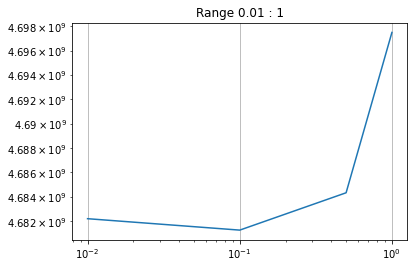

In [56]:
plt.plot(alphaRange[10:14],estimateCV[10:14])
plt.xscale('log')
plt.yscale('log')
plt.title('Range 0.01 : 1')
plt.grid(True)
#plt.savefig("CV_Alpha2.png", dpi=400,bbox_inches='tight')

Minimum alpha parameter is mostly 0.1 but depends on our data distibuation (data is suffled each time we run dataPreparetionColumn function)

### PCA

Algorithm from Shai Shalev-Shwartz, Shai Ben-David - Understanding Machine Learning_ From Theory to Algorithms - 2014

pseudocode from book:

input

A matrix of m examples X ∈ R^(m,d)

number of components n


if (m > d)

    A = X^t*X      # A is cov matrix of X
    Let u1,. . . ,un be the eigenvectors of A with largest n eigenvalues
else

    B = XX^t
    Let v1,. . . ,vn be the eigenvectors of B with largest n eigenvalues
    for i = 1,. . . ,n set ui = 1/(||X^t*vi||)*X^t*vi

output: u1,. . . ,un

Because rows of our data >> dimension of data, i'll use part of this code only in case of m>d

pseudocode:

input:

    data, number of components n
  
code:

    A = covariance matrix of X #(with numpy cov)
    find eigenvectors and eigenvalues of A #(with numpy linalg.eigh(A))
    place eigenvalues in decreasing order    
    U = matrix of u1..un    
    compression matrix W = U^T
    
output:

    pca_data = data*W

In [37]:
def pca(data, n):
    #calc of cov matrix and eigenvectors and eigenvalues
    A = np.cov(data, rowvar=False)
    eva, evec = np.linalg.eigh(A)
    #order
    i = np.argsort(eva)[::-1]
    evec = evec[:,i]
    eva = eva[i]
    #choose n
    evec = evec[:,:n]
    #pca data
    D = np.dot(data, evec)
    return D

In [114]:
data = dataPreparetionColumn(df,nomDataTransform,meandf,False,'median_house_value')
dataX,dataY = splitAnswer(data,'median_house_value',False)
pca_data = pca(dataX,12)
pca_data = pd.DataFrame(pca_data)
pca_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,1557.734964,308.300956,-19.488100,-3.964045,35.469478,-103.554490,-22.499191,-46.438035,13.773266,0.846264,-37.970089,-0.306293
1,23111.685903,144.381161,373.546609,147.485167,50.286870,-104.222753,-20.781738,-45.028054,14.320211,0.785834,-38.437287,-0.305750
2,5368.185004,-821.581441,-72.461002,-13.619798,44.511156,-101.870143,-27.355241,-45.661843,13.843576,0.893657,-38.168576,-0.306518
3,8442.035091,77.814989,4.177735,34.255037,30.733141,-102.153121,-22.006863,-46.647701,13.922155,0.716105,-38.111069,-0.306284
4,1364.297411,518.776290,232.936765,-51.313143,55.407190,-103.898910,-21.962570,-46.462982,13.770534,0.939431,-38.193338,-0.307556
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,2225.727758,737.007233,29.613269,-31.396935,55.157285,-103.500395,-21.924702,-44.899674,14.351747,0.762757,-38.362808,-0.307576
20636,2943.549473,-231.409993,108.710511,-96.436706,35.610585,-108.578460,-22.574671,-44.694944,13.682984,1.082817,-37.489327,-0.304886
20637,863.594939,122.393045,53.029238,-0.746065,34.211489,-108.438183,-22.277545,-45.690209,14.211910,0.932537,-38.496893,-0.306951
20638,4915.509146,1557.249428,630.159826,-63.658552,35.765250,-104.974398,-24.430508,-46.107928,13.880480,0.879972,-38.190869,-0.306724


[4737590353.680726, 11349879956.417007, 10094168239.020687, 10089461115.701788, 9919852929.760214, 9908377663.394674, 5464609608.352848, 5285762506.809704, 5180781569.259751, 5171734643.406429, 5116413401.724027, 4754390378.694287, 4737590353.680397, 4737590353.680397]
12  from max  13


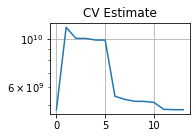

In [180]:
data = dataPreparetionColumn(df,nomDataTransform,meandf,True,'median_house_value')
alpha = 0.1
#divide data in K folds
kMax = 10 #divide data for 10 external cross-validation folds
estimateCV = []
for n in range(0,len(data.columns)):   #when n = 0 no PCA
    if n == 0:
        pca_data = data
    else:
        dataX,dataY = splitAnswer(data,'median_house_value',False)
        pca_data = pca(dataX,n)
        pca_data = pd.DataFrame(pca_data)
        pca_data.insert(1, 'median_house_value', dataY, True)
    costPCA = 0
    for k in range(1,kMax+1): 
        test,train = crossSplitTrain(pca_data,k,kMax)
        dfX,dfY = splitAnswer(train,'median_house_value',True,1)
        testX,testY = splitAnswer(test,'median_house_value',True,1)
        w = rr(dfX,dfY,alpha)
        costPCA += (kMax/len(data)) * cv_error(testX.to_numpy(),testY.to_numpy(),w)
    estimateCV.append((1/kMax)*costPCA)
print(estimateCV)
print(np.array(estimateCV).argmin(),' from max ',len(data.columns)-1)
fig = plt.figure()
plt.subplot(221)
plt.plot(range(0,len(data.columns)),estimateCV)
plt.xscale('linear')
plt.yscale('log')
plt.title('CV Estimate')
plt.grid(True)

plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

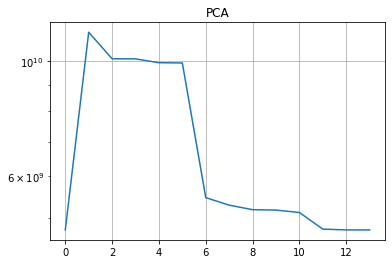

In [181]:
plt.plot(range(0,len(data.columns)),estimateCV)
plt.xscale('linear')
plt.yscale('log')
plt.title('PCA')
plt.grid(True)
#plt.savefig("PCA.png", dpi=400,bbox_inches='tight')

### Study the dependence of the cross-validated risk estimate on the parameter alpha of ridge regression after using of PCA
PCA parameter is 12

[4730227631.758006, 4730227631.757855, 4730227631.756352, 4730227631.741321, 4730227631.590996, 4730227630.087761, 4730227615.055448, 4730227464.737277, 4730225962.051082, 4730210984.706603, 4730066128.190366, 4729076712.333309, 4732098707.714327, 4745424300.080989, 4989067204.558733, 5550318934.385882, 8356547185.117934, 16476769925.613962, 43478136941.147606]


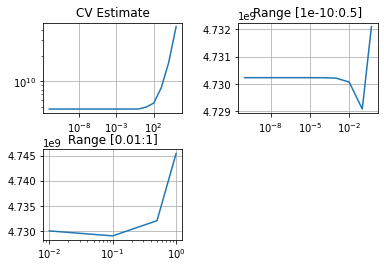

4729076712.333309 0.1


In [39]:
data = dataPreparetionColumn(df,nomDataTransform,elimdf,True,'median_house_value')
dataX,dataY = splitAnswer(data,'median_house_value',False)
pca_data = pca(dataX,12)
pca_data = pd.DataFrame(pca_data)
pca_data.insert(1, 'median_house_value', dataY, True)
# alpha range from 1e-12 to 1e+5
alphaRange = [1e-12,1e-11,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05, 1e-04, 1e-03, 0.01, 0.1,0.5, 1,
              10,100,1000,10000,1e+5] 
#divide data in K folds
kMax = 10 #divide data for 10 external cross-validation folds
estimateCV = []
for alpha in alphaRange:
    costAlpha = 0
    for k in range(1,kMax+1): 
        test,train = crossSplitTrain(pca_data,k,kMax)
        dfX,dfY = splitAnswer(train,'median_house_value',True,1)
        testX,testY = splitAnswer(test,'median_house_value',True,1)
        w = rr(dfX,dfY,alpha)
        costAlpha += (kMax/len(pca_data)) * cv_error(testX.to_numpy(),testY.to_numpy(),w)
    estimateCV.append((1/kMax)*costAlpha)
print(estimateCV)
fig = plt.figure()
plt.subplot(221)
plt.plot(alphaRange,estimateCV)
plt.xscale('log')
plt.yscale('log')
plt.title('CV Estimate')
plt.grid(True)
plt.subplot(222)
plt.plot(alphaRange[2:13],estimateCV[2:13])
plt.xscale('log')
plt.yscale('linear')
plt.title('Range [1e-10:0.5]')
plt.grid(True)
plt.subplot(223)
plt.plot(alphaRange[10:14],estimateCV[10:14])
plt.xscale('log')
plt.yscale('linear')
plt.title('Range [0.01:1]')
plt.grid(True)


plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()
print(min(estimateCV),alphaRange[estimateCV.index(min(estimateCV))])

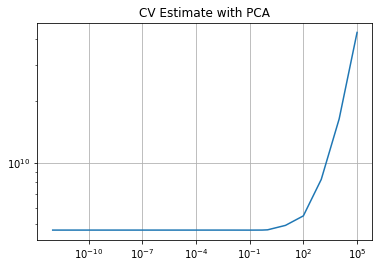

In [34]:
plt.plot(alphaRange,estimateCV)
plt.xscale('log')
plt.yscale('log')
plt.title('CV Estimate with PCA')
plt.grid(True)
#plt.savefig("CV_PCA.png", dpi=400,bbox_inches='tight')

### Finding alpha parameter with nested Cross-Validation

By using row elimination + nominal transformation

In [38]:
data = dataPreparetionColumn(df,nomDataTransform,elimdf,True,'median_house_value')
dataX,dataY = splitAnswer(data,'median_house_value',False)
pca_data = pca(dataX,12)
pca_data = pd.DataFrame(pca_data)
pca_data.insert(1, 'median_house_value', dataY, True)
alphaRange = [1e-12,1e-11,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05, 1e-04, 1e-03, 0.01, 0.1,0.5, 1,
              10,100,1000,10000,1e+5] 
kMax = 5 #divide data for 5 external cross-validation folds
lMax = 10 #divide data for 10 internal cross-validation folds
alphaParam = []
costParam = []
for k in range(1,kMax+1): 
    test,train = crossSplitTrain(pca_data,k,kMax)
    intCVEstimate = []
    for l in range(1,lMax+1):
        ctest,ctrain = crossSplitTrain(train,l,lMax)
        dfX,dfY = splitAnswer(ctrain,'median_house_value',True,1)
        testX,testY = splitAnswer(ctest,'median_house_value',True,1)
        intCostParam = []
        for alpha in alphaRange:
            w = rr(dfX,dfY,alpha)
            intCostParam.append((lMax/len(train)) * cv_error(testX.to_numpy(),testY.to_numpy(),w))
        intCVEstimate.append(intCostParam)
    matrix = np.matrix(intCVEstimate)
    matrix = matrix.sum(axis = 0)/lMax
    dfX,dfY = splitAnswer(train,'median_house_value',True,1)
    testX,testY = splitAnswer(test,'median_house_value',True,1)
    matrix = matrix.A1
    #alpha = matrix.argmin() + 1
    alpha = alphaRange[matrix.argmin()]
    w = rr(dfX,dfY,alpha)
    cost = (kMax/len(pca_data))*cv_error(testX.to_numpy(),testY.to_numpy(),w)
    alphaParam.append(alpha)
    costParam.append(cost)
    print(alpha, cost)
costParam = np.array(costParam)
param = alphaParam[costParam.argmin()]
print("best alpha;   loss")
print(param, '   ', costParam.min())

0.1 4708239781.563938
0.01 4845264685.958866
0.1 4725795111.117155
0.1 4626201280.745333
0.1 4716438669.089169
best alpha;   loss
0.1     4626201280.745333


### Check results with Sklearn RidgeCV

0.5     4729041668.514207



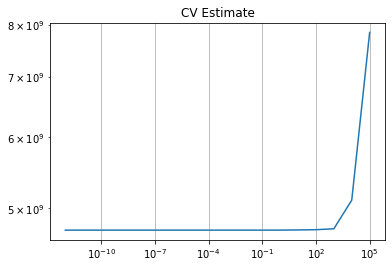

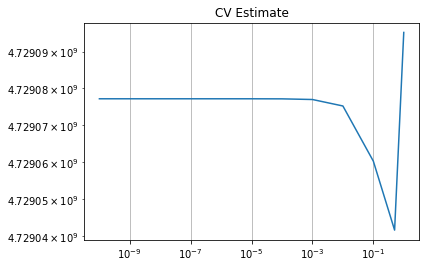

In [58]:
from sklearn.linear_model import RidgeCV

data = dataPreparetionColumn(df,nomDataTransform,elimdf,False,'median_house_value')
alphaRange = [1e-12,1e-11,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05, 1e-04, 1e-03, 0.01, 0.1,0.5, 1,
              10,100,1000,10000,1e+5] 
dataX,dataY = splitAnswer(data,'median_house_value',0)
clf = RidgeCV(alphas=alphaRange, store_cv_values = True).fit(dataX,dataY)
cvv = clf.cv_values_.sum(axis = 0)/clf.cv_values_.shape[0]
print(clf.alpha_, '   ', np.min(cvv))
print()
plt.plot(alphaRange,cvv)
plt.xscale('log')
plt.yscale('log')
plt.title('CV Estimate')
plt.grid(True)
plt.show()

plt.plot(alphaRange[2:14],cvv[2:14])
plt.xscale('log')
plt.yscale('log')
plt.title('Range [1e-10:0.5]')
plt.grid(True)
plt.show()

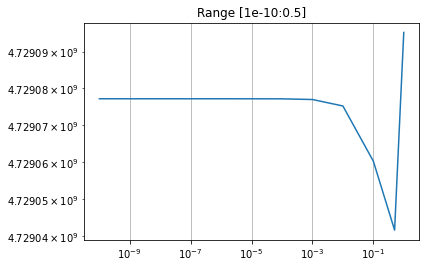

In [60]:
plt.plot(alphaRange[2:14],cvv[2:14])
plt.xscale('log')
plt.yscale('log')
plt.title('Range [1e-10:0.5]')
plt.grid(True)
#plt.savefig("CV_SK1.png", dpi=400,bbox_inches='tight')